# **The main objective of this notebook is to build a Convolutional Neural Network (CNN) using the UTKFace dataset to pedicting age by regression.**



Dataset Link:
*  https://huggingface.co/datasets/py97/UTKFace-Cropped?utm_source=chatgpt.com


I am going to use google collab for training of model, you can use own IDE for this model.

In [1]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.listdir("/content/drive/My Drive")

['DriveSharer',
 'Kolop',
 'GDToT',
 'WhatsApp Image 2024-12-20 at 22.40.37_fcdc2f8a.jpg',
 'Colab Notebooks',
 'WhatsApp Image 2025-02-08 at 20.49.09_02e7cb53.jpg',
 'Copy of VC_RedistInstaller.exe',
 'To-do list.gsheet',
 'Google sheets',
 'Untitled spreadsheet.gsheet',
 'changed data type(numeric) (2).xlsx',
 'changed data type(numeric) (1).xlsx',
 'changed data type(numeric).xlsx',
 'changed data type(numeric).gsheet',
 'df_78_data.xlsx',
 'pratice sheet.gsheet',
 'Ask Gemini about the role of pyhton in plant bree... (5).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (4).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (3).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (2).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (1).gdoc',
 'Ask Gemini about the role of pyhton in plant bree....gdoc',
 'Emails to different stakeholders.gdoc',
 'mmem.jpg',
 'Tableau',
 'Learner-facing C3 Automatidata dataset for Tableau project (2).gshe

### Below mentioned code is used to extract dataset from zip file in google drive

In [3]:
import tarfile
import os

#cnn_path = '/content/drive/My Drive/Dl Models/CNN/'

# Path to your .tar.gz file
#file_path = os.path.join(cnn_path, 'UTKFace.tar.gz')

# Path to your manually created UTKFace folder
#dataset_folder = os.path.join(cnn_path, 'UTKFace')

# Extract the dataset correctly
#with tarfile.open(file_path, 'r:gz') as tar:
    #tar.extractall(path=dataset_folder)

#print("File Extraction Completed into:", dataset_folder)


## As this is picture based dataset so there must be different ways to check it out problems in it.

#### Getting exact location of folder


In [4]:
cnn_folder = '/content/drive/My Drive/Dl Models/CNN'
print(os.listdir(cnn_folder))

['UTKFace.tar.gz', 'UTKFace', 'best_gender_model.h5', 'CNN_Binary.ipynb', 'CNN_regression.ipynb', 'CNN_Multi-class.ipynb']


In [6]:
folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'
all_images = sorted([f for f in os.listdir(folder) if f.endswith('.jpg')])[:7000]
print("Total Images Selected:", len(all_images))
print("First Few Images:", all_images[:5])

Total Images Selected: 7000
First Few Images: ['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg', '100_1_0_20170112213001988.jpg.chip.jpg', '100_1_0_20170112213303693.jpg.chip.jpg']


### Checking corrputed Images

In [7]:
import cv2

#bad_images=[]

#for f in all_images:
 #img = cv2.imread(img_path)
  #if img is None:
   # bad_images.append(f)

#print("Bad images found:", len(bad_images))
#if bad_images:
 # print("Example of corrupted images:", bad_images[:5])

There is no missing image

### Checking incorrect file names

In [8]:
wrong_names = [f for f in all_images if len(f.split('_')) < 4]
print("Incorrectly name files:", len(wrong_names))
if wrong_names:
  print("Example of bad names:", wrong_names[:5])

Incorrectly name files: 0


These files are very few in whole dataset so they can be deleted without any issue

In [9]:
# Deleting incorreclty named files
for f in wrong_names:
  file_path = os.path.join(folder, f)
  if os.path.exists(file_path):
    os.remove(file_path)
    print("Incorrectly files deleted:", f)



In [10]:
# Confirming deleting
wrong_names = [f for f in os.listdir(folder) if len(f.split("_")) < 4]
print("Incorrelty named files left:", len(wrong_names))

Incorrelty named files left: 0


### Checking Labels Range

In [11]:

all_images = sorted([f for f in os.listdir(folder) if f.endswith('.jpg')])[:7000]
ages=[]
genders = []
races = []

for f in all_images:
  try:
    a, g, r, _ = f.split('_')
    ages.append(int(a))
    genders.append(int(g))
    races.append(int(r))
  except:
    continue

print("Age range:", min(ages), "-", max(ages))
print("Gender Values:", set(genders))
print("Race Values:", set(races))


Age range: 1 - 116
Gender Values: {0, 1}
Race Values: {0, 1, 2, 3, 4}


### Checking image size

In [12]:
image_shapes = []
for f in all_images[:30]:
  img_path = os.path.join(folder, f)
  img = cv2.imread(img_path)
  if img is not None:
    image_shapes.append(img.shape)

print('Examples of image size:', image_shapes)


Examples of image size: [(200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3)]


### Checking for duplicated name

In [13]:

unique_names = set(all_images)
print("Total images:", len(all_images))
print('Unique images filenames:', len(unique_names))

if len(all_images) != len(unique_names):
  print("There are duplicate filenames")
else:
  print("No duplicates are found")


Total images: 7000
Unique images filenames: 7000
No duplicates are found


### Checking duplicated images(same pixel)

In [14]:
import numpy as np
image_hashes = set()
duplicate_images = []

for f in all_images:
  img_path = os.path.join(folder, f)
  img = cv2.imread(img_path)
  if img is not None:
    img_hash = hash(img.tobytes())
    if img_hash in image_hashes:
      duplicate_images.append(f)
    else:
      image_hashes.add(img_hash)

print("Exact duplicate image found:", len(duplicate_images))
if duplicate_images:
  print("Example duplicate:", duplicate_images[:10])

Exact duplicate image found: 0


These duplicates are very high. So they must be removed for avoiding from biasness in dataset

In [15]:
# Removing duplicates

for f in duplicate_images:
  file_path = os.path.join(folder, f)
  if os.path.exists(file_path):
    os.remove(file_path)

print("Duplicates are removed")

Duplicates are removed


In [16]:
# To confirm remove of out duplicates
unique_names = set(os.listdir(folder))
print("Total unique files:", len(unique_names))

Total unique files: 23315


As these 390 are removed so this verifies, duplicated are removed

## Training and testing model for Multi-Class Classification *(Gender Prediction)*

In [17]:
!pip install keras-tuner -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 1.6 MB/s eta 0:00:00


In [18]:
# importing libraries
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch, HyperModel


/tmp/ipython-input-1806476481.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch, HyperModel


Due to shortage of RAM of google collab. I am using only first 5K pictures for model training. If you have better ram, you can use full dataset.

In [19]:
# setting up path

folder = '/content/drive/My Drive/Dl Models/CNN/UTKFace'

all_images = [f for f in os.listdir(folder) if f.endswith('.jpg')]
all_images.sort()

# Selecting first 5K images
selected_images = all_images[:7000]

print("Total Selected Images:", len(selected_images))

Total Selected Images: 7000


In [20]:
# Loading and preprocessing data

image_size = 128
images = []
labels = []

for f in selected_images:
  if f.endswith('.jpg'):
    try:
      age, gender, race, _ = f.split('_')
      age = int(age)

      img = cv2.imread(os.path.join(folder, f))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (image_size, image_size))
      images.append(img)
      labels.append(age)
    except:
      continue


In [21]:
# Normalization of array
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels, dtype='float32')

max_age = np.max(labels)
labels = labels / max_age
print("Labels Nomalized. Max_age :", max_age)

Labels Nomalized. Max_age : 116.0


This helps model to train fastly and better on one scale (0-1)

In [22]:
# Spliting for testing and training
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 5600
Testing Samples: 1400


Data agumentation helps in generalization and reduce bias as size of dataset given is only 5K

In [23]:
# Data Agumentation
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)
print("Data Agumentation Generator Ready")

Data Agumentation Generator Ready


In [24]:
# HyperModel

num_classes = 5

class AgeRegressionHyperModel(HyperModel):
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes

  def build(self, hp):
    model = Sequential()

    # Conv layer 1
    model.add(Conv2D(
        filters=hp.Int('conv1_filter', 32, 64, step=32),
        kernel_size = (3,3),
        activation='relu',
        kernel_regularizer=l2(0.001),
        input_shape=self.input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout1',0.2,0.4,step=0.1)))
    # Conv layer 2
    model.add(Conv2D(
        filters=hp.Int('conv2_filter', 32, 64, step=32),
        kernel_size=(3,3),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(rate=hp.Float('dropout2', 0.2,0.4,step=0.1)))
    # Adding 3rd Conv layer
    model.add(Conv2D(128,(3,3), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    # Flattening from 2D to 1D
    model.add(Flatten())
    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_unit', 64, 128, step=64),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ))
    model.add(Dropout(rate=hp.Float('dropout', 0.3, 0.5, step=0.1)))
    # output
    model.add(Dense(1, activation='linear'))

    # Compiling model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model

In [25]:
# HyperParameter Tuning

tuner = RandomSearch(
    AgeRegressionHyperModel(input_shape=(image_size, image_size, 3), num_classes=num_classes),
    objective='val_mae',
    max_trials=5,
    executions_per_trial=1,
    directory='race_tuning',
    project_name='UTKFace_CNN_Race'
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Tuning Search

tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2,
             batch_size=32)


Trial 5 Complete [00h 29m 57s]
val_mae: 3.3643641471862793

Best val_mae So Far: 0.2486547976732254
Total elapsed time: 02h 03m 29s


In [27]:
# Getting best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:")
print("Conv1 filter:", best_hp.get('conv1_filter'))
print("Conv2 filter:", best_hp.get('conv2_filter'))
print("Dense unit:", best_hp.get('dense_unit'))
print("Dropout rate:", best_hp.get('dropout1'), best_hp.get('dropout2'), best_hp.get('dropout'))
print("Optimizer:", best_hp.get('optimizer'))


Best Hyperparameters:
Conv1 filter: 32
Conv2 filter: 64
Dense unit: 128
Dropout rate: 0.30000000000000004 0.30000000000000004 0.3
Optimizer: rmsprop


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [28]:
# Training best model
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = best_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - loss: 7.4386 - mae: 0.6093 - val_loss: 0.8039 - val_mae: 0.2556
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - loss: 0.1312 - mae: 0.0761 - val_loss: 0.0871 - val_mae: 0.0863
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - loss: 1.6668 - mae: 0.1296 - val_loss: 0.5108 - val_mae: 0.5906
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - loss: 0.3360 - mae: 0.1225 - val_loss: 0.0750 - val_mae: 0.0573
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - loss: 0.1268 - mae: 0.0664 - val_loss: 0.0501 - val_mae: 0.0711
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - loss: 0.1952 - mae: 0.0867 - val_loss: 0.0439 - val_mae: 0.0620
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - loss: 0.2352 - mae: 0.0876 - val_loss: 0.0388 - val_mae: 0.0516
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - loss: 0.0508 - mae: 0.0616 - val_loss: 0.2359 - val_mae: 0.1900
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/

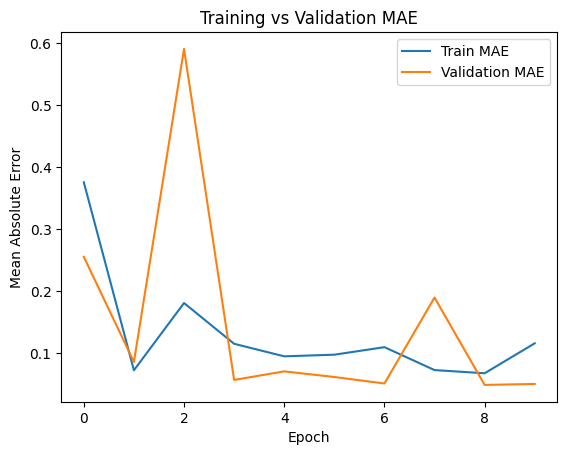

In [29]:
# Training Vs Validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

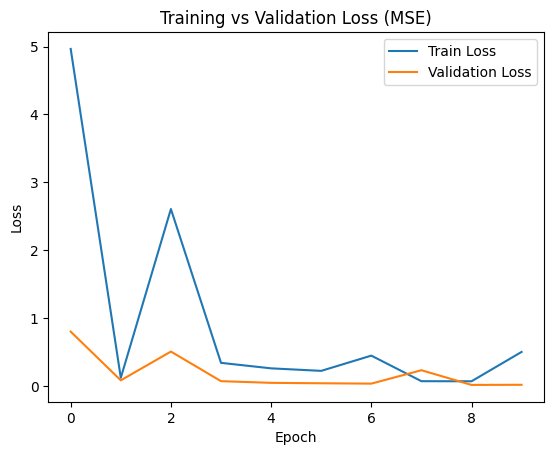

In [30]:
# Training Vs Validation Loss (MSE)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error


In [32]:
# Evaluating model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Test MAE:, {mae:.4f}")
print(f"Average age predicted error: {mae * max_age:.2f} years")

44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - loss: 0.0182 - mae: 0.0468
Test MAE:, 0.0493
Average age predicted error: 5.72 years


In [33]:
# Predict age
y_pred = best_model.predict(X_test) * max_age
y_true = y_test * max_age

44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step


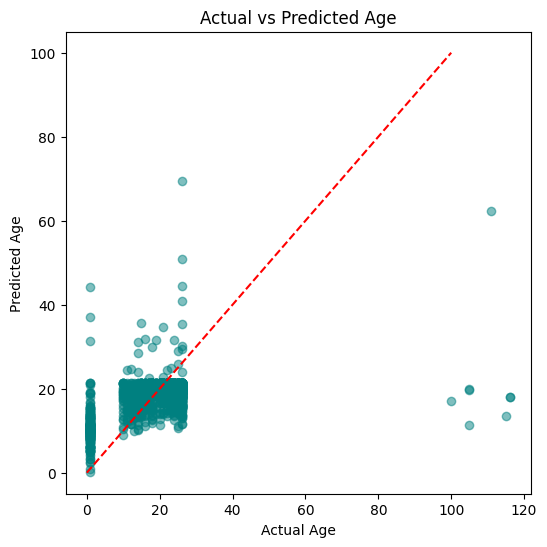

In [34]:
# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.5, color='teal')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()

In [35]:
# Saving model
best_model.save('/content/drive/My Drive/Dl Models/CNN/best_age_model.h5')
print("Age Regression Model Saved Successfully!")

Age Regression Model Saved Successfully!
